In [1]:
import os
os.getcwd()

'C:\\Users\\ASUS'

In [5]:
import pandas as pd
df = pd.read_csv(r"D:\Master Uni Marburg\2nd Term Summer 25\XAI\Exercise\[ss25]week_1\[ss25]week_1\practical-exercise\dataset\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df['Outcome'].sum()/len(df)

0.3489583333333333

In [5]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}:{num_distinct_values} distinct values")

Pregnancies:17 distinct values
Glucose:136 distinct values
BloodPressure:47 distinct values
SkinThickness:51 distinct values
Insulin:186 distinct values
BMI:248 distinct values
DiabetesPedigreeFunction:517 distinct values
Age:52 distinct values
Outcome:2 distinct values


In [7]:
df.describe().style.format("{:.2f}")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [9]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [11]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [13]:
y_pred = clf.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt

In [17]:
y_base_line = [0] * len(y_pred)

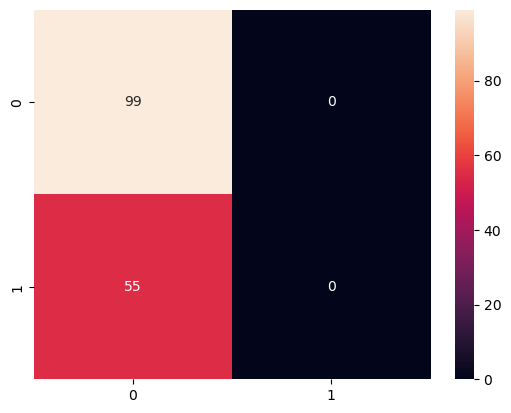

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154



In [19]:
cm = confusion_matrix(y_test,y_base_line)
sns.heatmap(cm, annot = True)
plt.show()
print(classification_report(y_test,y_base_line,zero_division=0))

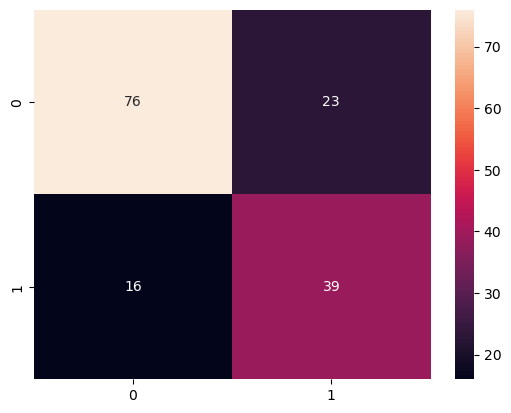

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        99
           1       0.63      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot =True)
plt.show()
print(classification_report(y_test, y_pred, zero_division=0))

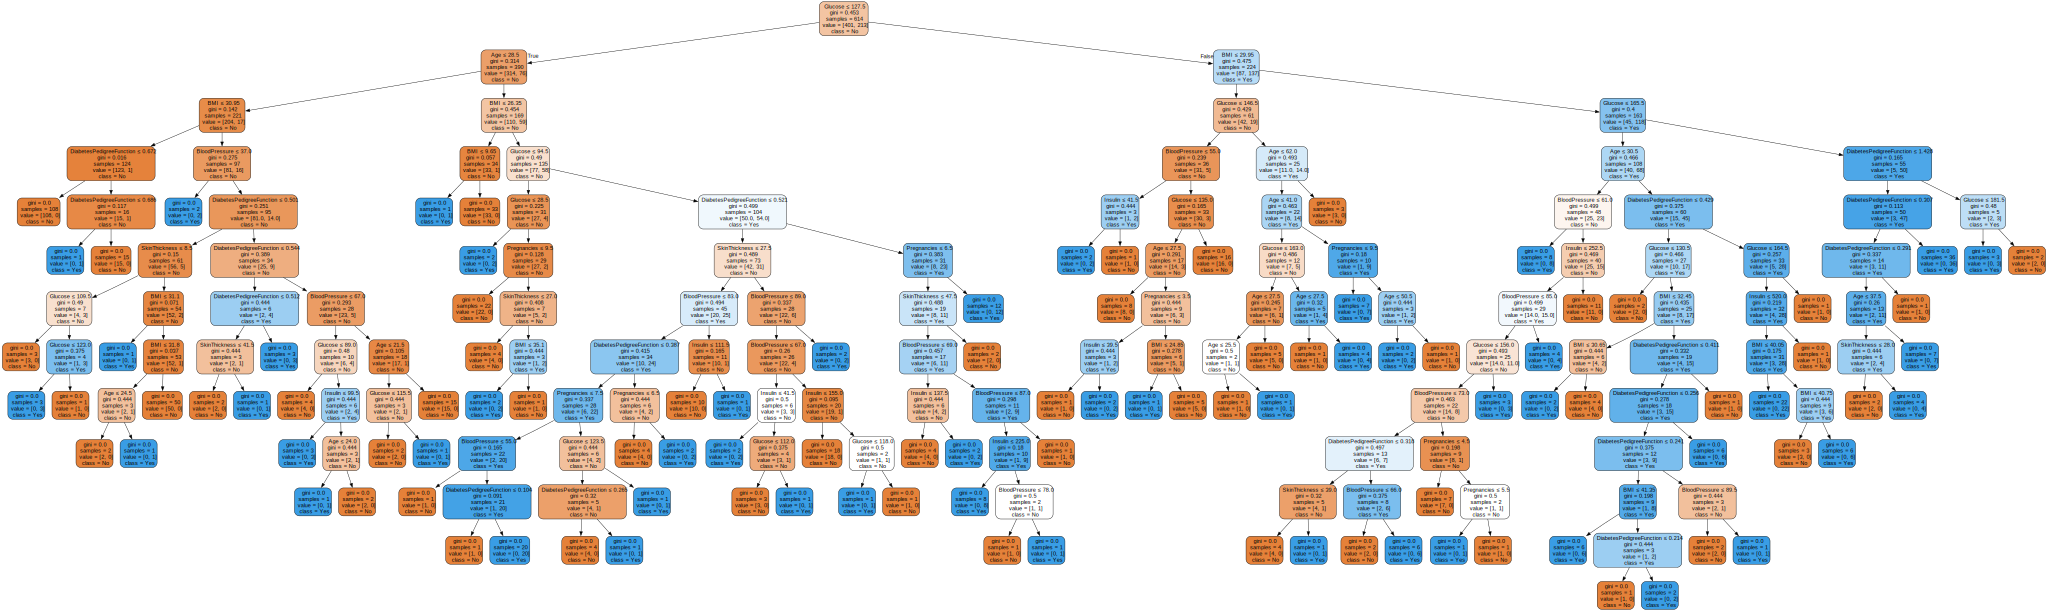

In [23]:
features = X_train.columns
target = ["No","Yes"]
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=features,  
                     class_names=target,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph

In [25]:
X_test.iloc[12]

Pregnancies                   4.00
Glucose                     148.00
BloodPressure                60.00
SkinThickness                27.00
Insulin                     318.00
BMI                          30.90
DiabetesPedigreeFunction      0.15
Age                          29.00
Name: 199, dtype: float64

In [27]:
print(f"The prediction is {clf.predict(X_test.iloc[12:13])[0]}")

The prediction is 1


In [29]:
print(f"The ground truth is {y_test.iloc[12]}")

The ground truth is 1


In [31]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 3, random_state=0)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

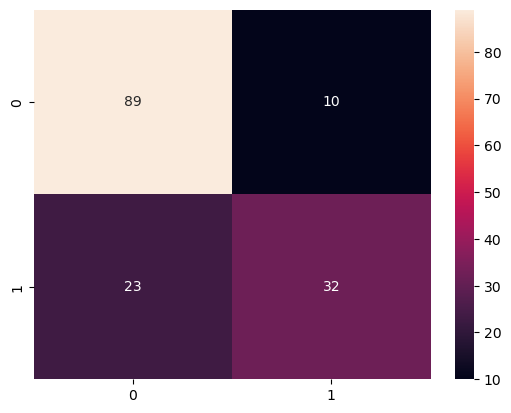

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.58      0.66        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



In [33]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot =True)
plt.show()
print(classification_report(y_test, y_pred))